In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
from astropy.io import fits as pyfits

In [2]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

In [3]:
from pipeline import get_label_str

In [117]:
obj_name = 'NGC6778'
Te_corr = 3000
random_seed = 42
data_dir = Path(os.environ['MUSE_DATA']) / Path('{}/maps'.format(obj_name))
save_plots = True

In [118]:
Cutout2D_position=None#(80,80)
if Cutout2D_position is None:
    C2D_str = ''
else:
    C2D_str = '_C2D'
PL = pipeline.PipeLine(data_dir = data_dir,
                       obj_name = obj_name, 
                       error_str='error', err_default=0.05,
                       random_seed=random_seed,
                       flux_normalisation=1e-20,
                       Cutout2D_position=Cutout2D_position,
                       Cutout2D_size=(10,10))

PL.log_.level=1

PDF_name = 'figures/{}_{}{}'.format(obj_name, Te_corr, C2D_str)

PL.obs.addSum(('O1r_7771A', 'O1r_7773A', 'O1r_7775A'), 'O1r_7773+')

PL.obs.removeLine('O1r_7771A')
PL.obs.removeLine('O1r_7773A')
PL.obs.removeLine('O1r_7775A')
PL.obs.getLine(label='O2r_4649.13A').to_eval = 'L(4649.13) + L(4650.84)'

PL.add_MC(150)

PL.obs.def_EBV()
if obj_name == 'M142':
    PL.red_cor_obs(EBV_min = 0., plot_=False, label1=("H1r_6563A", "H1r_9229A", "H1r_8750A"), r_theo=(2.86, 0.0254, 0.0106))
else:
    PL.red_cor_obs(EBV_min = 0., plot_=False)

PL.set_mask_Hb(0.005)

PL.correc_NII(Te_corr)
PL.correc_OII(Te_corr, rec_label='O2r_4649.13A')
PL.read_TeNe('{}/PipelineResults/{}_{}{}_TeNe.pickle.gz'.format(os.environ['MUSE_DATA'], obj_name, Te_corr, C2D_str))
PL.read_abunds('{}/PipelineResults/{}_{}{}_abunds.pickle.gz'.format(os.environ['MUSE_DATA'], obj_name, Te_corr, C2D_str))

PL.define_ICF_ML(N_X=5, tol=1, learning_rate=.1, n_estimators=500, max_depth=10)
PL.predict_ICF_ML()
PL.set_abunds_elem_PyNeb()
PL.set_abunds_elem_ML()

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4541: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data_tab = np.genfromtxt(obsFile, dtype=None, delimiter=delimiter, names=True)
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4766: RuntimeWarning: invalid value encountered in true_divide
  obs_over_theo = (line1.obsIntens / line2.obsIntens) / r_theo


Instantiation. V 0.17
Training set size = 0, Test set size = 0
RM loaded from ICFs_NGC6778.ai4neb_xgb0
RM loaded from ICFs_NGC6778.ai4neb_xgb1
RM loaded from ICFs_NGC6778.ai4neb_xgb2
RM loaded from ICFs_NGC6778.ai4neb_xgb3
RM loaded from ICFs_NGC6778.ai4neb_xgb4
RM loaded from ICFs_NGC6778.ai4neb_xgb5
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 71370, Test set size = 17843
Training set size = 71370, Test set size = 17843
Test data scaled. Log10 applied. 
Training set size = 71370, Test set size = 151
Predicting from 5 inputs to 5 outputs using 151 data in 0.01 secs.


In [119]:
PL.print_TeNe(PDF_name+'_TeNe.tex')

N2S2       - Te:  8394 +/-  221 K, Ne:  856 +/-  215
N2S2_84    - Te:  8195 +/-  219 K, Ne:  882 +/-  225
S3Cl3      - Te:  8155 +/-  292 K, Ne: 1038 +/-  369
S3S2       - Te:  8289 +/-  298 K, Ne:  876 +/-  221
S3Ar4      - Te:  8129 +/-  295 K, Ne: 6374 +/- 1360
He1        - Te:  4296 +/-  800 K, Ne:  nan +/-  nan
PJ         - Te:   nan +/-  nan K, Ne:  nan +/-  nan
PJ_ANN     - Te:   nan +/-  nan K, Ne:  nan +/-  nan


/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [120]:
PL.print_ionic(PDF_name+'_ab_ionic.tex')

H I 4861        & 12.00 $\pm$ 0.00 \\
H I 6563        & 11.99 $\pm$ 0.00 \\
H I 8750        & 11.97 $\pm$ 0.05 \\
H I 9229        & 11.95 $\pm$ 0.05 \\
He I 4713       & 11.32 $\pm$ 0.03 \\
He I 5876       & 11.21 $\pm$ 0.03 \\
He I 6678       & 11.20 $\pm$ 0.03 \\
He I 7065       & 11.17 $\pm$ 0.04 \\
He I 7281       & 11.05 $\pm$ 0.04 \\
He II 4686      &  9.61 $\pm$ 0.04 \\
[C I] 8728      &  5.67 $\pm$ 0.08 \\
C II 5342       &  8.97 $\pm$ 0.03 \\
C II 6462       &  9.14 $\pm$ 0.03 \\
[N I] 5199+     &  6.73 $\pm$ 0.06 \\
N II 5676       &  9.17 $\pm$ 0.03 \\
N II 5679       &  9.46 $\pm$ 0.03 \\
[N II] 5755     &  7.94 $\pm$ 0.06 \\
[N II] 6548     &  7.95 $\pm$ 0.06 \\
[N II] 6584     &  7.95 $\pm$ 0.05 \\
[O I] 6300      &  7.30 $\pm$ 0.06 \\
[O I] 6364      &  7.30 $\pm$ 0.06 \\
O I 7773+       &  9.13 $\pm$ 0.04 \\
O II 4649       &  9.63 $\pm$ 0.04 \\
O II 4661       &  9.39 $\pm$ 0.04 \\
[O II] 7319+    &  8.02 $\pm$ 0.13 \\
[O II] 7330+    &  8.02 $\pm$ 0.13 \\
[O III] 4959

In [121]:
for k in PL.ICF_ML:
    icf = PL.ICF_ML[k]
    print('{:15s}: {:.2f} +/- {:.2f}'.format(k, icf[0], np.nanstd(icf)))

ICF_Op = (PL.abund_dic['O2_7330A+'][0] + PL.abund_dic['O3_4959A'][0]) /  PL.abund_dic['O2_7330A+'][0]
print('O+             : {:.2f} '.format(ICF_Op))

N+             : 4.19 +/- 0.79
O+ + O++       : 1.08 +/- 0.01
S+ + S++       : 1.22 +/- 0.03
Cl2+ + Cl3+    : 1.20 +/- 0.03
Ar2+ + Ar3+    : 1.06 +/- 0.01
O+             : 4.28 


In [122]:
PL.print_abunds_elem(PDF_name+'_ab_elem.tex', print_rules=True)

============= He =============
11.14 +/- 0.03 & ML this work       & \\
11.14 +/- 0.03 & direct_He.23       & He = He2 + He3 \\
11.14 +/- 0.03 & KH01_4a            & He = He2 + He3 \\
11.14 +/- 0.03 & DIMS14_10          & He = (He2 + He3) * 1.0 \\
============= N =============
 8.57 +/- 0.06 & ML this work       & \\
 8.58 +/- 0.06 & TPP77_14           & N = (N2) * (O2 + O3) / O2 \\
 8.59 +/- 0.06 & KB94_A1.10         & N = (N2) * KB94_A10  / O2 \\
 8.58 +/- 0.06 & KB94_A1.10b        & N = (N2) * KB94_A10b  / O2 \\
 8.59 +/- 0.06 & KH01_4c            & N = (N2) * (O2 + O3) / O2 * (He2 + He3) / He2 \\
 8.65 +/- 0.06 & DIMS14_14          & N = (N2) * 10**(-0.16 * O3 / (O2 + O3) * (1.0 + np.log10(He3 / (He2 + He3)))) * DIMS14_12 / O2 \\
 9.08 +/- 0.09 & DIMS14_14b         & N = (N2) * 10**(0.64 * O3 / (O2 + O3)) * DIMS14_12 / O2 \\
============= O =============
 8.69 +/- 0.06 & ML this work       & \\
 8.65 +/- 0.06 & direct_O.23        & O = O2 + O3 \\
 8.67 +/- 0.06 & TPP77_13          

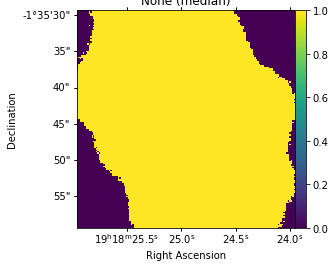

In [123]:
mask_Hb_int = np.where(PL.mask_Hb, 1, 0)
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, image=PL.mask_Hb)
pyfits.writeto(PDF_name+'_mask.fits', mask_Hb_int, PL.obs.fits_header, overwrite=True);

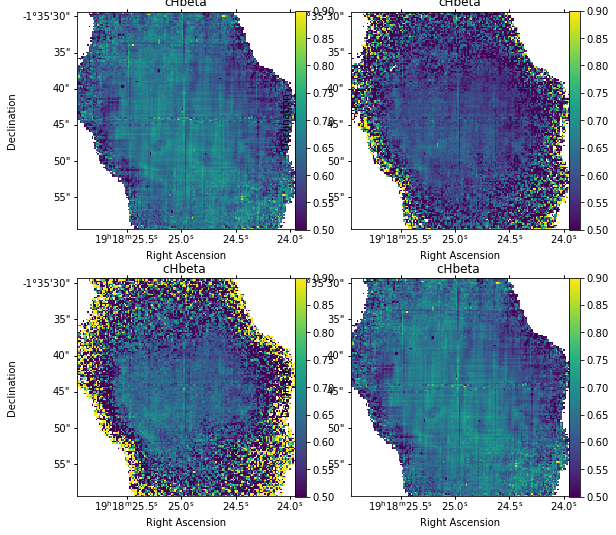

In [125]:
try:
    with np.errstate(divide='ignore', invalid='ignore'):
        EBV = PL.obs.extinction.E_BV
        PL.red_cor_obs(EBV_min = 0., plot_=False, label1="H1r_6563A", label2="H1r_4861A", r_theo=2.85)    
        cHbeta = PL.obs.extinction.cHbeta
        PL.red_cor_obs(EBV_min = 0., plot_=False, label1="H1r_9229A", label2="H1r_4861A", r_theo=0.0254)    
        cHbeta9 = PL.obs.extinction.cHbeta
        PL.red_cor_obs(EBV_min = 0., plot_=False, label1="H1r_8750A", label2="H1r_4861A", r_theo=0.0106)    
        cHbeta12 = PL.obs.extinction.cHbeta
        PL.obs.extinction.E_BV = EBV
        
        f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9), subplot_kw={'projection': PL.obs.wcs})
        PL.plot(ax=ax1, data=cHbeta, vmin=0.5, vmax=.9, title='cHbeta', type_='orig', mask='Hb')
        PL.plot(ax=ax2, data=cHbeta9, vmin=0.5, vmax=.9, title='cHbeta', type_='orig', mask='Hb')
        PL.plot(ax=ax3, data=cHbeta12, vmin=0.5, vmax=0.9, title='cHbeta ', type_='orig', mask='Hb')
        PL.plot(ax=ax4, data=PL.obs.extinction.cHbeta, vmin=0.5, vmax=0.9, title='cHbeta ', type_='orig', mask='Hb')
        
except:
    pass

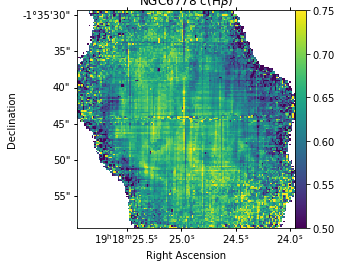

In [126]:
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, image=PL.get_image(PL.obs.extinction.cHbeta, type_='orig'), vmin=0.5, vmax=0.75, title=obj_name+r' c(H$\beta$)',
            label_cut=('H1r_6563A', 'H1r_4861A'), mask='Hb')
if save_plots:
    f.savefig(PDF_name+'_cHbeta.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


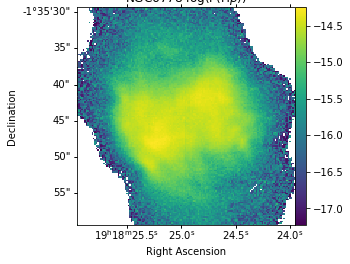

In [127]:
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, label='H1r_4861A', title=obj_name+r' log(F(H$\beta$))', use_log=True, mask='Hb')
if save_plots:
    f.savefig(PDF_name+'_Hbeta.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


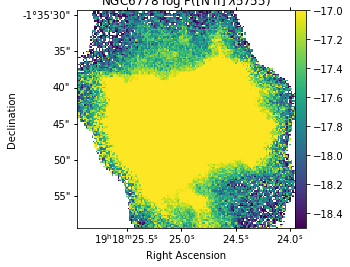

In [128]:
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, label='N2_5755A', title=obj_name+r' log F([N II] $\lambda$5755)', use_log=True, vmin=-18.5, vmax=-17, mask='Hb')
if save_plots:
    f.savefig(PDF_name+'_NII5755.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


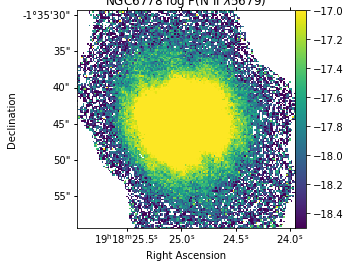

In [129]:
f,ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax, label='N2r_5679.56A', title=obj_name+r' log F(N II $\lambda$5679)', use_log=True, mask='Hb', vmin=-18.5, vmax=-17)
if save_plots:
    f.savefig(PDF_name+'_NII5679.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


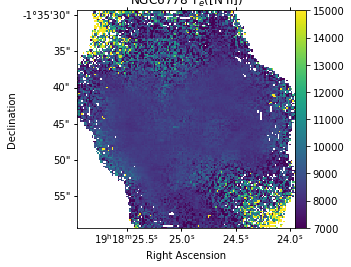

In [130]:
vmin = 7000
vmax = 15000
f, ax = plt.subplots(1, 1, subplot_kw={'projection': PL.obs.wcs}, figsize=(5,4))
PL.plot(ax=ax, data=PL.TeNe['N2S2']['Te'], title=obj_name+r' T$_e$([N II])', vmin=vmin, vmax=vmax, type_='median', mask='Hb')
if save_plots:
    f.savefig(PDF_name+'_TeN2.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


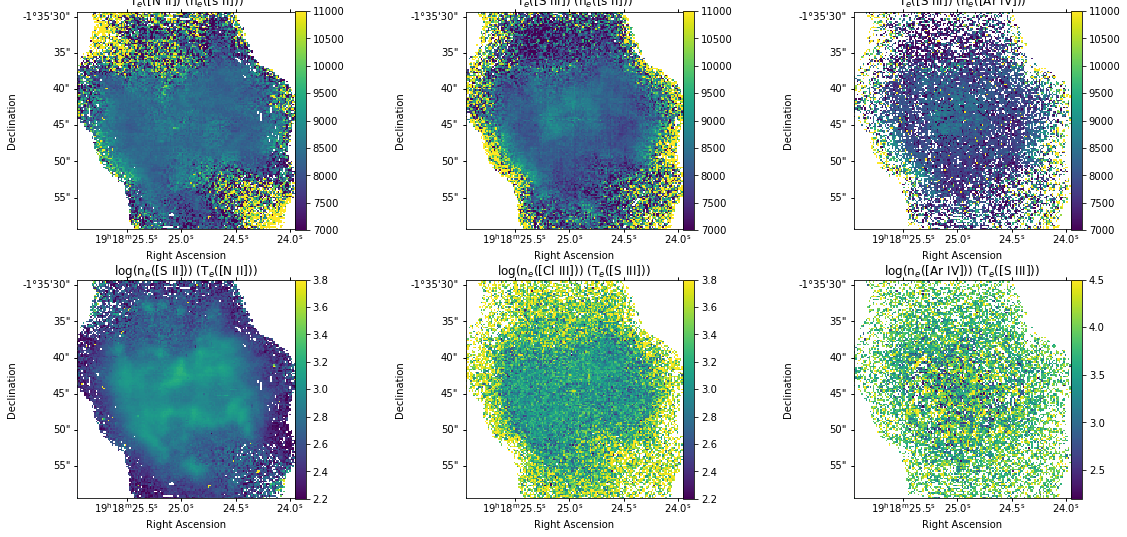

In [131]:
SN_cut = None
vmin = 7000
vmax = 11000
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, subplot_kw={'projection': PL.obs.wcs}, figsize=(18,12))
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title=r'T$_e$([N II]) (n$_e$([s II]))', vmin=vmin, vmax=vmax, 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut, type_='median', mask='Hb')
PL.plot(ax=ax2, data=PL.TeNe['S3S2']['Te'], title=r'T$_e$([S III]) (n$_e$([s II]))', vmin=vmin, vmax=vmax, 
        label_cut=('S3_9069A', 'S3_6312A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut, type_='median', mask='Hb')
PL.plot(ax=ax3, data=PL.TeNe['S3Ar4']['Te'], title=r'T$_e$([S III]) (n$_e$([Ar IV]))', vmin=vmin, vmax=vmax, 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None, type_='median', mask='Hb')
PL.plot(ax=ax4, data=np.log10(PL.TeNe['N2S2']['Ne']), title=r'log(n$_e$([S II])) (T$_e$([N II]))', vmin=2.2, vmax=3.8, 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut, type_='median', mask='Hb')
PL.plot(ax=ax5, data=np.log10(PL.TeNe['S3Cl3']['Ne']), title=r'log(n$_e$([Cl III])) (T$_e$([S III]))', vmin=2.2, vmax=3.8, 
        label_cut=('S3_9069A', 'S3_6312A', 'Cl3_5518A', 'Cl3_5538A'), SN_cut=SN_cut, type_='median', mask='Hb')
PL.plot(ax=ax6, data=np.log10(PL.TeNe['S3Ar4']['Ne']), title=r'log(n$_e$([Ar IV])) (T$_e$([S III]))', vmin=2.2, vmax=4.5, 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None, type_='median', mask='Hb')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=-0.3)
if save_plots:
    f.savefig(PDF_name+'_TeNe.pdf')

In [132]:
line_labels = ('He1r_6678A', 'He2r_4686A', 'C1_8728A', 'C2r_6462.0A', 'N1_5199A+', 
               'N2_6548A', 'N2r_5679.56A', 'O1_6300A', 'O1r_7773+', 'O2_7330A+',
               'O2r_4649.13A', 'O3_4959A', 'S2_6731A', 'S3_9069A',
               'Cl3_5518A', 'Cl4_7531A', 'Ar3_7136A', 'Ar4_4740A', 'Ar5_7005A')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-133-2fbf16f27dbb>:8: RuntimeWarning: divide by zero encountered in log10
  im = np.log10(PL.get_image(label=line.label, type_='median', returnObs=True))
<ipython-input-133-2fbf16f27dbb>:8: RuntimeWarning: invalid value encountered in log10
  im = np.log10(PL.get_image(label=line.label, type_='median', returnObs=True))


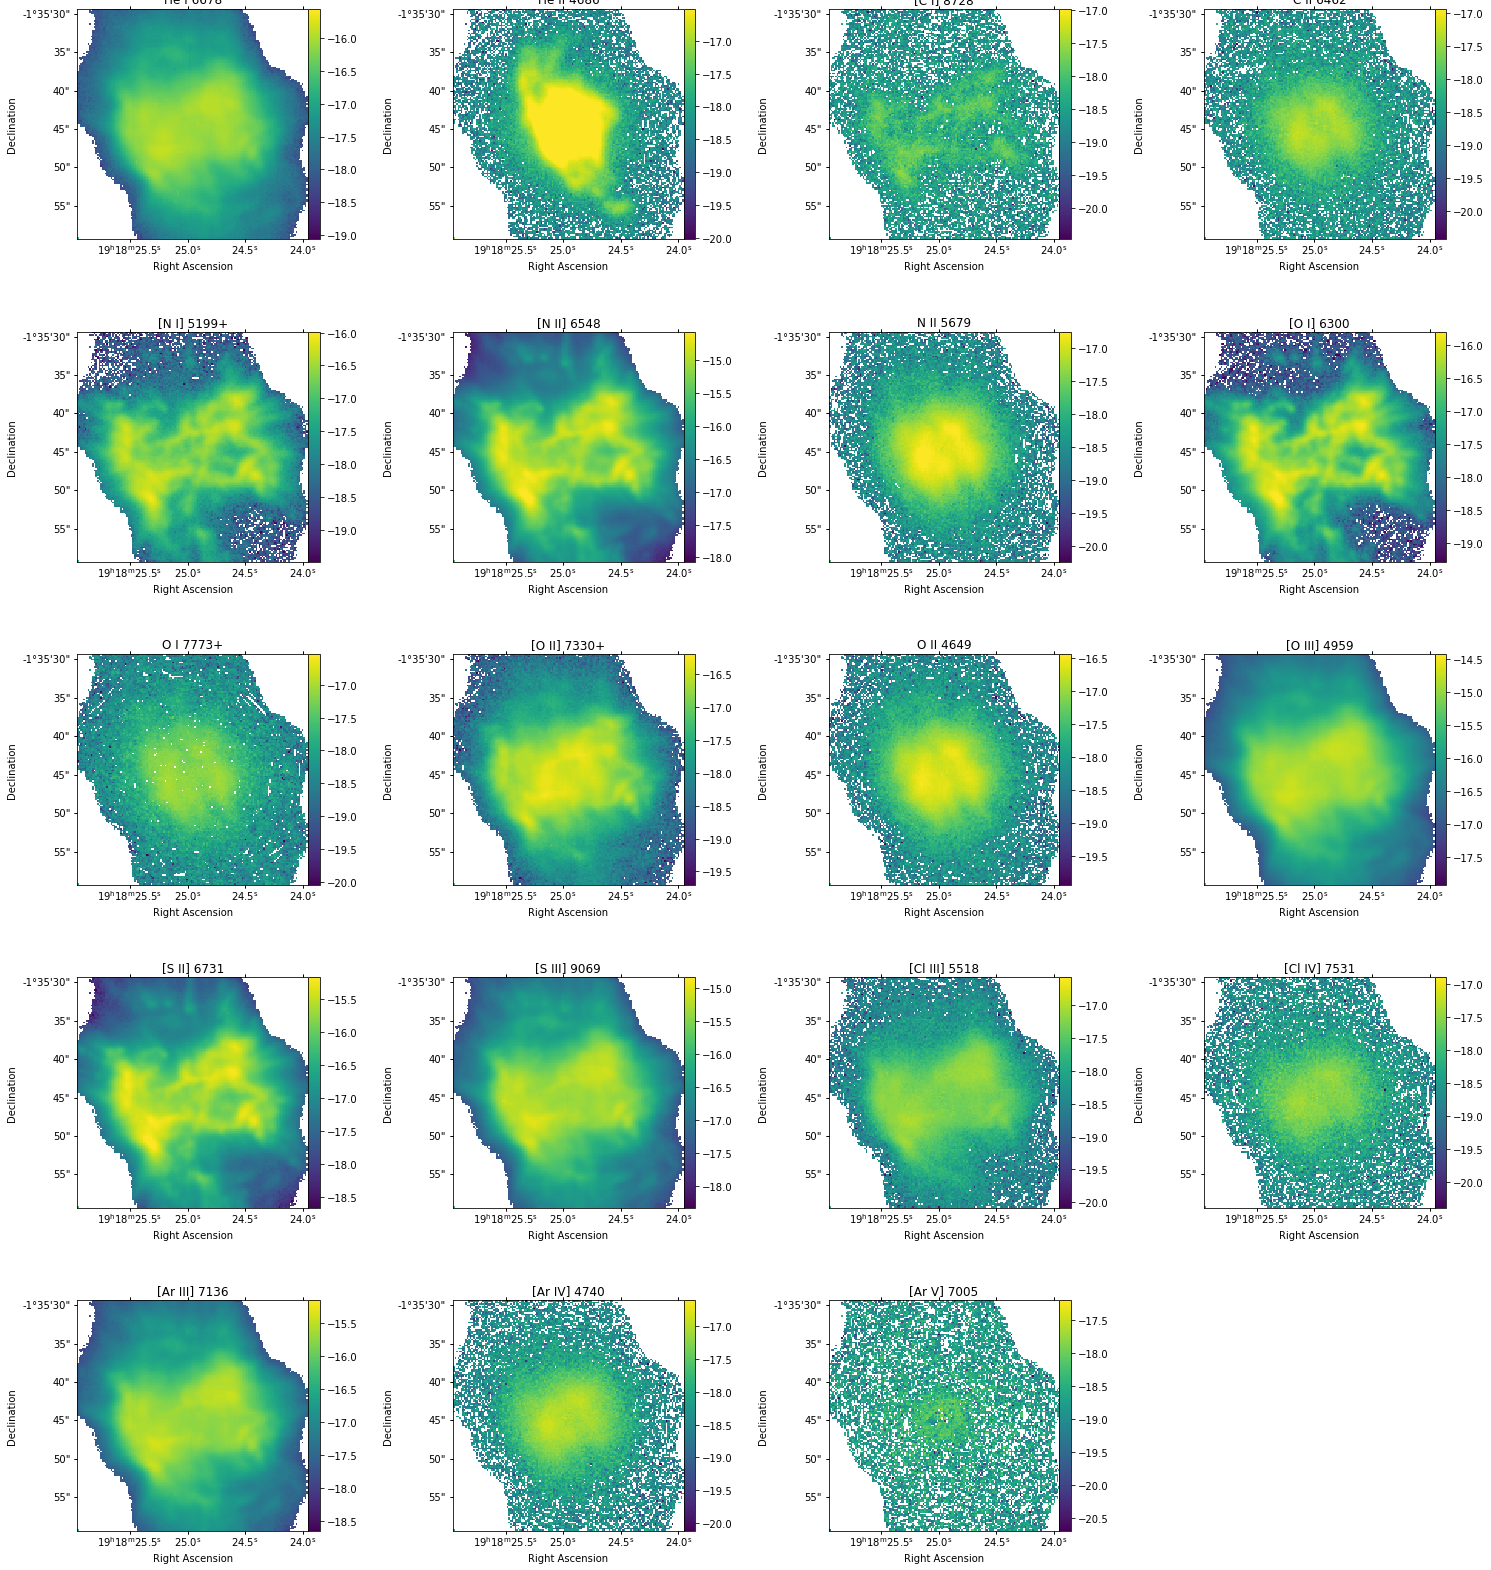

In [133]:
f, axes = plt.subplots(5,4,figsize=(25,28), subplot_kw={'projection': PL.obs.wcs})
i_axes = 0

for label in line_labels:
    line = PL.obs.getLine(label=label)
    if line.is_valid:
        tit = get_label_str(line.label)
        im = np.log10(PL.get_image(label=line.label, type_='median', returnObs=True))
        im[np.isinf(im)] = np.nan
        med = np.nanmedian(im[PL.mask_Hb])
        PL.plot(label=line.label, title=tit, ax=axes.ravel()[i_axes], 
                type_='orig', use_log=True, vmin=med-2, vmax=med+1.5, returnObs=True, mask='Hb')
        i_axes += 1
    else:
        print('{} is invalid'.format(line.label))
#axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
if save_plots:
    f.savefig(PDF_name+'_fluxes.pdf')


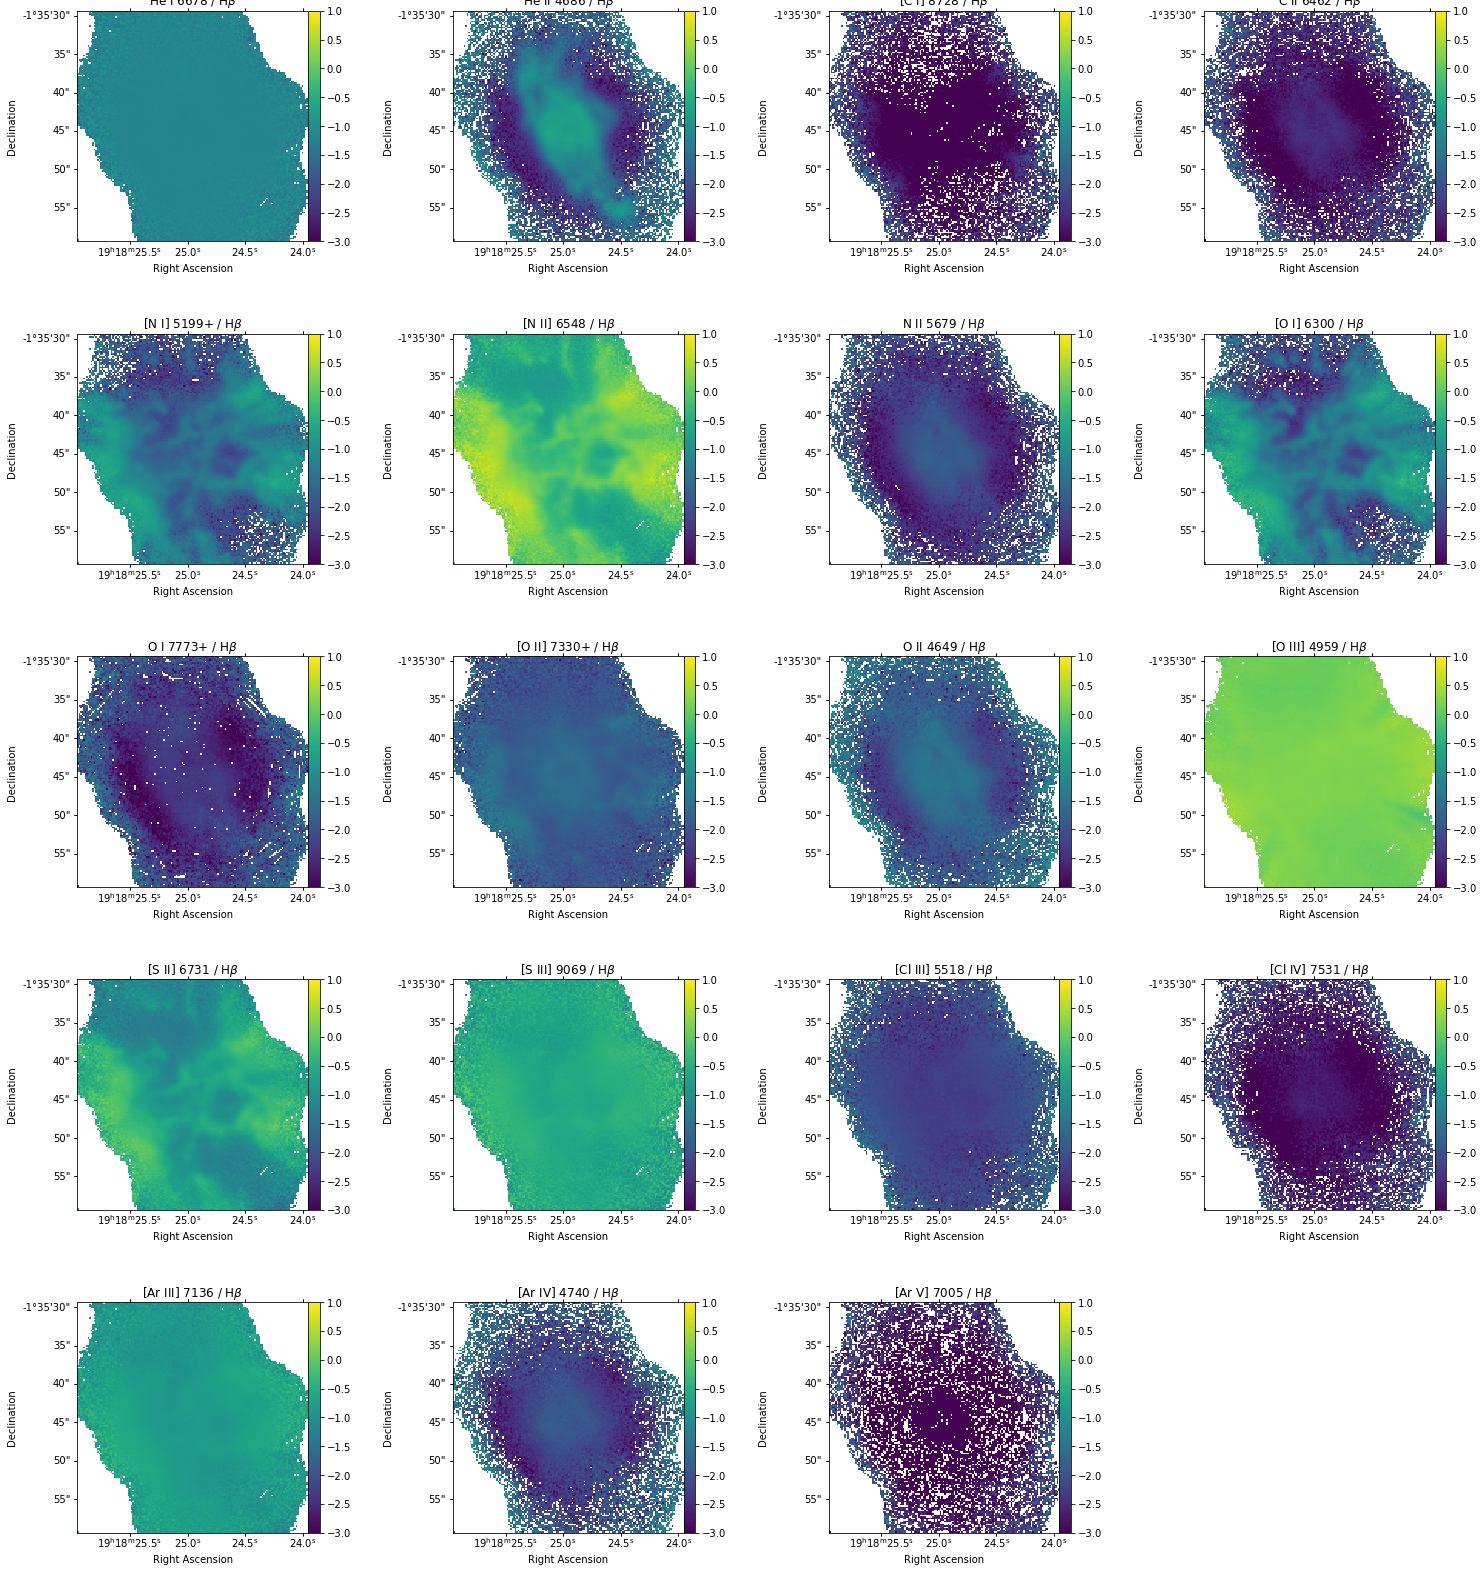

In [134]:
f, axes = plt.subplots(5,4,figsize=(25,28), subplot_kw={'projection': PL.obs.wcs})
i_axes = 0
for label in line_labels:
    line = PL.obs.getLine(label=label)
    if line.is_valid:
        tit = r'{} / H$\beta$'.format(get_label_str(line.label))
        PL.plot(label=(line.label,'H1r_4861A'), title=tit, ax=axes.ravel()[i_axes], type_='orig', 
                use_log=True, vmin=-3, vmax=1, mask='Hb')
        i_axes += 1
    else:
        print('{} is invalid'.format(line.label))
#axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
if save_plots:
    f.savefig(PDF_name+'_fluxesNorm.pdf')


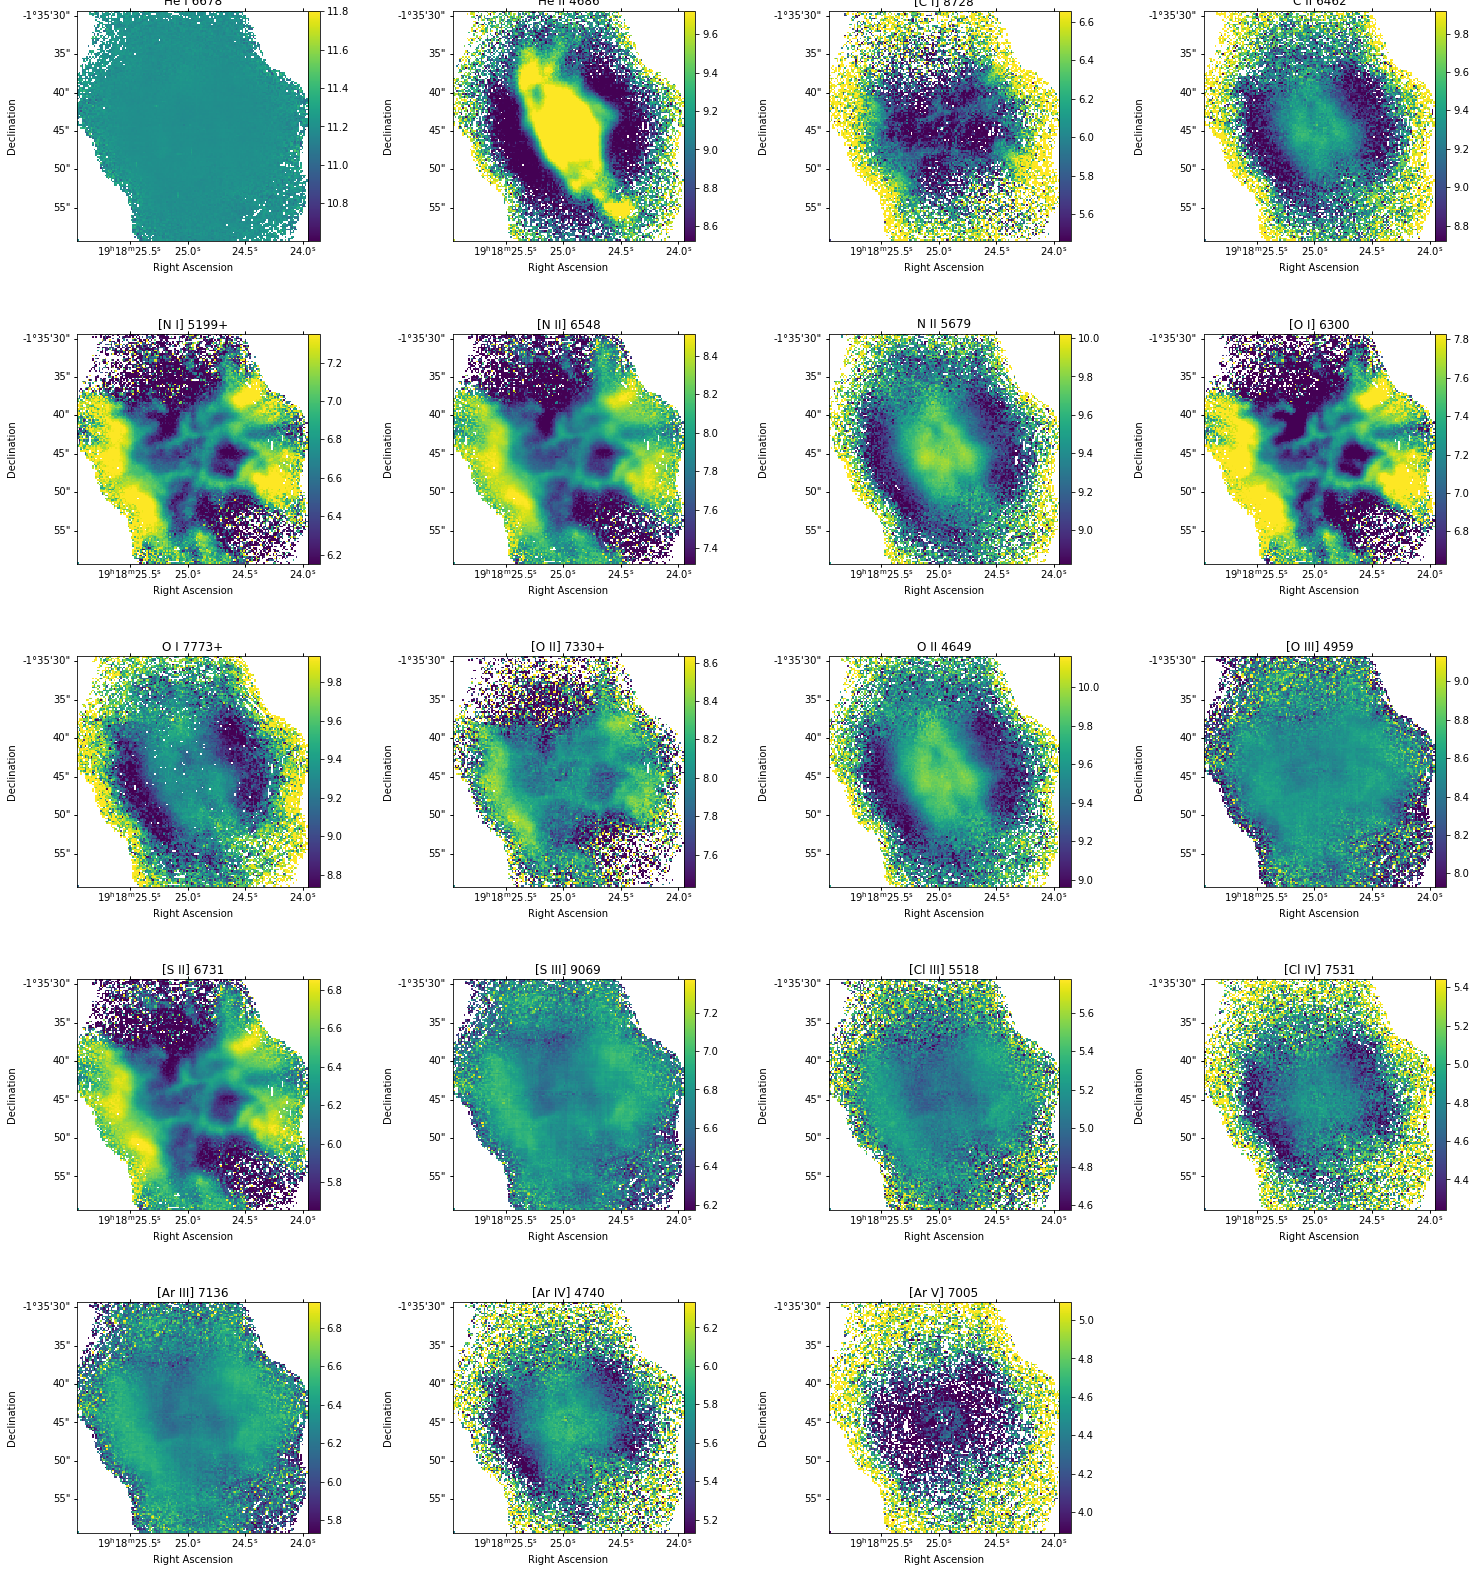

In [135]:
f, axes = plt.subplots(5,4,figsize=(25,28), subplot_kw={'projection': PL.obs.wcs})
i_axes = 0
for label in line_labels:
    line = PL.obs.getLine(label=label)
    if line.is_valid:
        tit = get_label_str(line.label)
        #mask = PL.get_mask_SN(line.label, 1.5)
        with np.errstate(divide='ignore', invalid='ignore'):
            to_show = 12+np.log10(PL.abund_dic[line.label])
        to_show[np.isinf(to_show)] = np.nan
        #med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
        #to_show[to_show < (med - 6)] = np.nan
        med = np.nanmedian(PL.get_image(to_show, type_='orig')[PL.mask_Hb])
        std = np.nanstd(PL.get_image(to_show, type_='orig')[PL.mask_Hb])
        vmin = med - 0.6
        vmax = med + 0.6
        #print(line.label, max_to_show, med, std, vmin, vmax, mask.sum())
        PL.plot(data=to_show, title=tit, ax=axes.ravel()[i_axes], 
                vmin=vmin, vmax=vmax, type_='orig', mask='Hb')
        i_axes += 1
    else:
        print('{} is invalid'.format(line.label))
#axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
if save_plots:
    f.savefig(PDF_name+'_abunds.pdf')


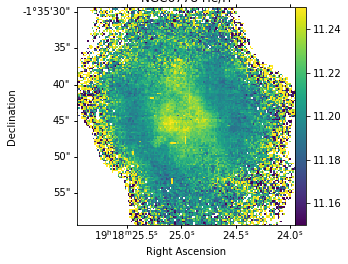

In [136]:
PL.abund_dic['He'] = PL.abund_dic['He1r_6678A'] + PL.abund_dic['He2r_4686A']
f, ax = plt.subplots(1, 1, subplot_kw={'projection': PL.obs.wcs}, figsize=(5,4))
with np.errstate(divide='ignore', invalid='ignore'):
    PL.plot(data=12+np.log10(PL.abund_dic['He']), title=obj_name+' He/H', vmin=11.15, vmax=11.25, 
            type_='orig', ax=ax, mask='Hb')
if save_plots:
    f.savefig(PDF_name+'_HeoH.pdf')    

ADF(O+) = 12.77, ADF(O++) = 12.24


/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


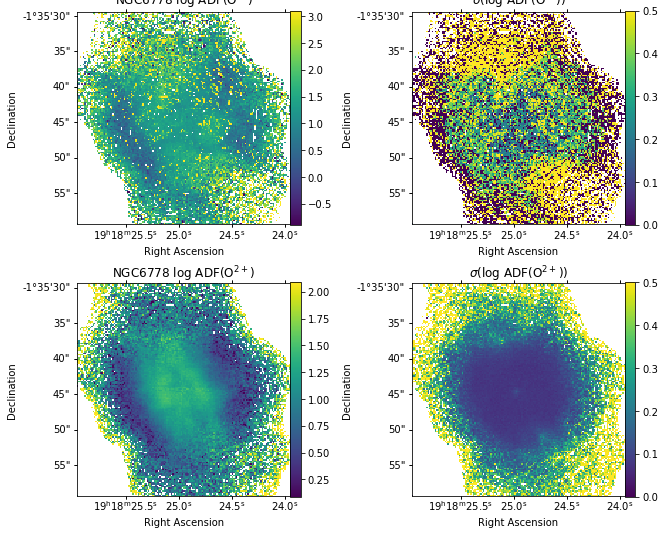

In [137]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10), subplot_kw={'projection': PL.obs.wcs})

with np.errstate(divide='ignore', invalid='ignore'):
    ADF_Op = np.log10(PL.abund_dic['O1r_7773+'] / (PL.abund_dic['O2_7319A+'] + PL.abund_dic['O2_7330A+']) * 2)
    ADF_Opp = np.log10(PL.abund_dic['O2r_4649.13A'] / PL.abund_dic['O3_4959A'])
    
ADF_Op_int = ADF_Op[0]
ADF_Opp_int = ADF_Opp[0]
print('ADF(O+) = {:.2f}, ADF(O++) = {:.2f}'.format(10**ADF_Op_int, 10**ADF_Opp_int))
PL.plot(data=ADF_Op, title=obj_name+r' log ADF(O$^+$)', ax=ax1, vmin=ADF_Op_int-2, vmax=ADF_Op_int+2, type_='median', mask='Hb')
PL.plot(data=ADF_Op, title=r'$\sigma$(log ADF(O$^+$))', ax=ax2, vmin=0, vmax=.5, type_='std', mask='Hb')
PL.plot(data=ADF_Opp, title=obj_name+r' log ADF(O$^{2+}$)', ax=ax3, vmin=ADF_Opp_int-1, vmax=ADF_Opp_int+1, type_='median', mask='Hb')
PL.plot(data=ADF_Opp, title=r'$\sigma$(log ADF(O$^{2+}$))', ax=ax4, vmin=0, vmax=.5, type_='std', mask='Hb')

#ax1.contour(PL.obs.reshape(data=ADF_Op)[:,:,0], levels=(ADF_Op_int,), colors='r')
#ax3.contour(PL.obs.reshape(data=ADF_Opp)[:,:,0], levels=(ADF_Opp_int,), colors='r')

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.)
if save_plots:
    f.savefig(PDF_name+'_ADFs.pdf')    

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


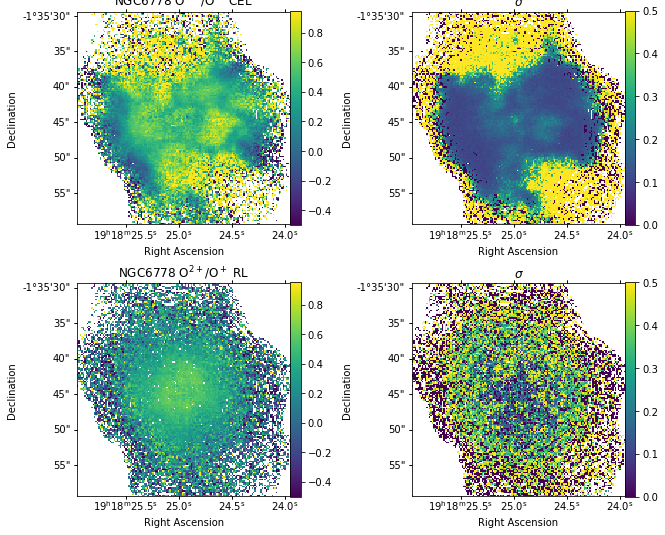

In [138]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10), subplot_kw={'projection': PL.obs.wcs})

with np.errstate(divide='ignore', invalid='ignore'):
    Ion_O_RL = -np.log10(PL.abund_dic['O1r_7773+'] / PL.abund_dic['O2r_4649.13A'] )
    Ion_O_CL = -np.log10((PL.abund_dic['O2_7319A+'] + PL.abund_dic['O2_7330A+']) / 2 / PL.abund_dic['O3_4959A'])
    
PL.plot(data=Ion_O_CL, title=obj_name+r' O$^{2+}$/O$^+$ CEL', ax=ax1, type_='orig', mask='Hb', vmin=-.5, vmax=.95)
PL.plot(data=Ion_O_CL, title=r'$\sigma$ ', ax=ax2, type_='std', mask='Hb', vmax=0.5)
PL.plot(data=Ion_O_RL, title=obj_name+r' O$^{2+}$/O$^+$ RL', ax=ax3,  type_='orig', mask='Hb', vmin=-.5, vmax=.95)
PL.plot(data=Ion_O_RL, title=r'$\sigma$ ', ax=ax4, type_='std', mask='Hb', vmax=0.5)


f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.)
if save_plots:
    f.savefig(PDF_name+'_Ion_O.pdf')    

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


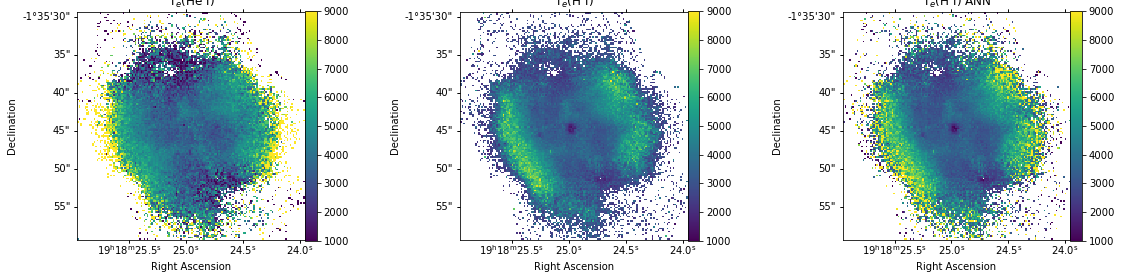

In [139]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': PL.obs.wcs}, figsize=(18,6))
if obj_name == 'HF22':
    vmin=1000
    vmax=4000
else:
    vmin=1000
    vmax=9000
PL.plot(data=PL.TeNe['He1']['Te'], vmin=vmin, vmax=vmax, title=r'T$_e$(He I)', ax=ax1, SN_cut=4, label_cut='He1r_7281A', mask='Hb')
PL.plot(data=PL.TeNe['PJ']['Te'], vmin=vmin, vmax=vmax,  title=r'T$_e$(H I)', ax=ax2, SN_cut=4, label_cut='He1r_7281A', mask='Hb')
PL.plot(data=PL.TeNe['PJ_ANN']['Te'], vmin=vmin, vmax=vmax,  title=r'T$_e$(H I) ANN', ax=ax3, SN_cut=4, label_cut='He1r_7281A', mask='Hb')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.)
if save_plots:
    f.savefig(PDF_name+'_Te_altern.pdf')

<ipython-input-140-e33f8858ee66>:7: RuntimeWarning: divide by zero encountered in log10
  med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]
<ipython-input-140-e33f8858ee66>:7: RuntimeWarning: invalid value encountered in log10
  med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]


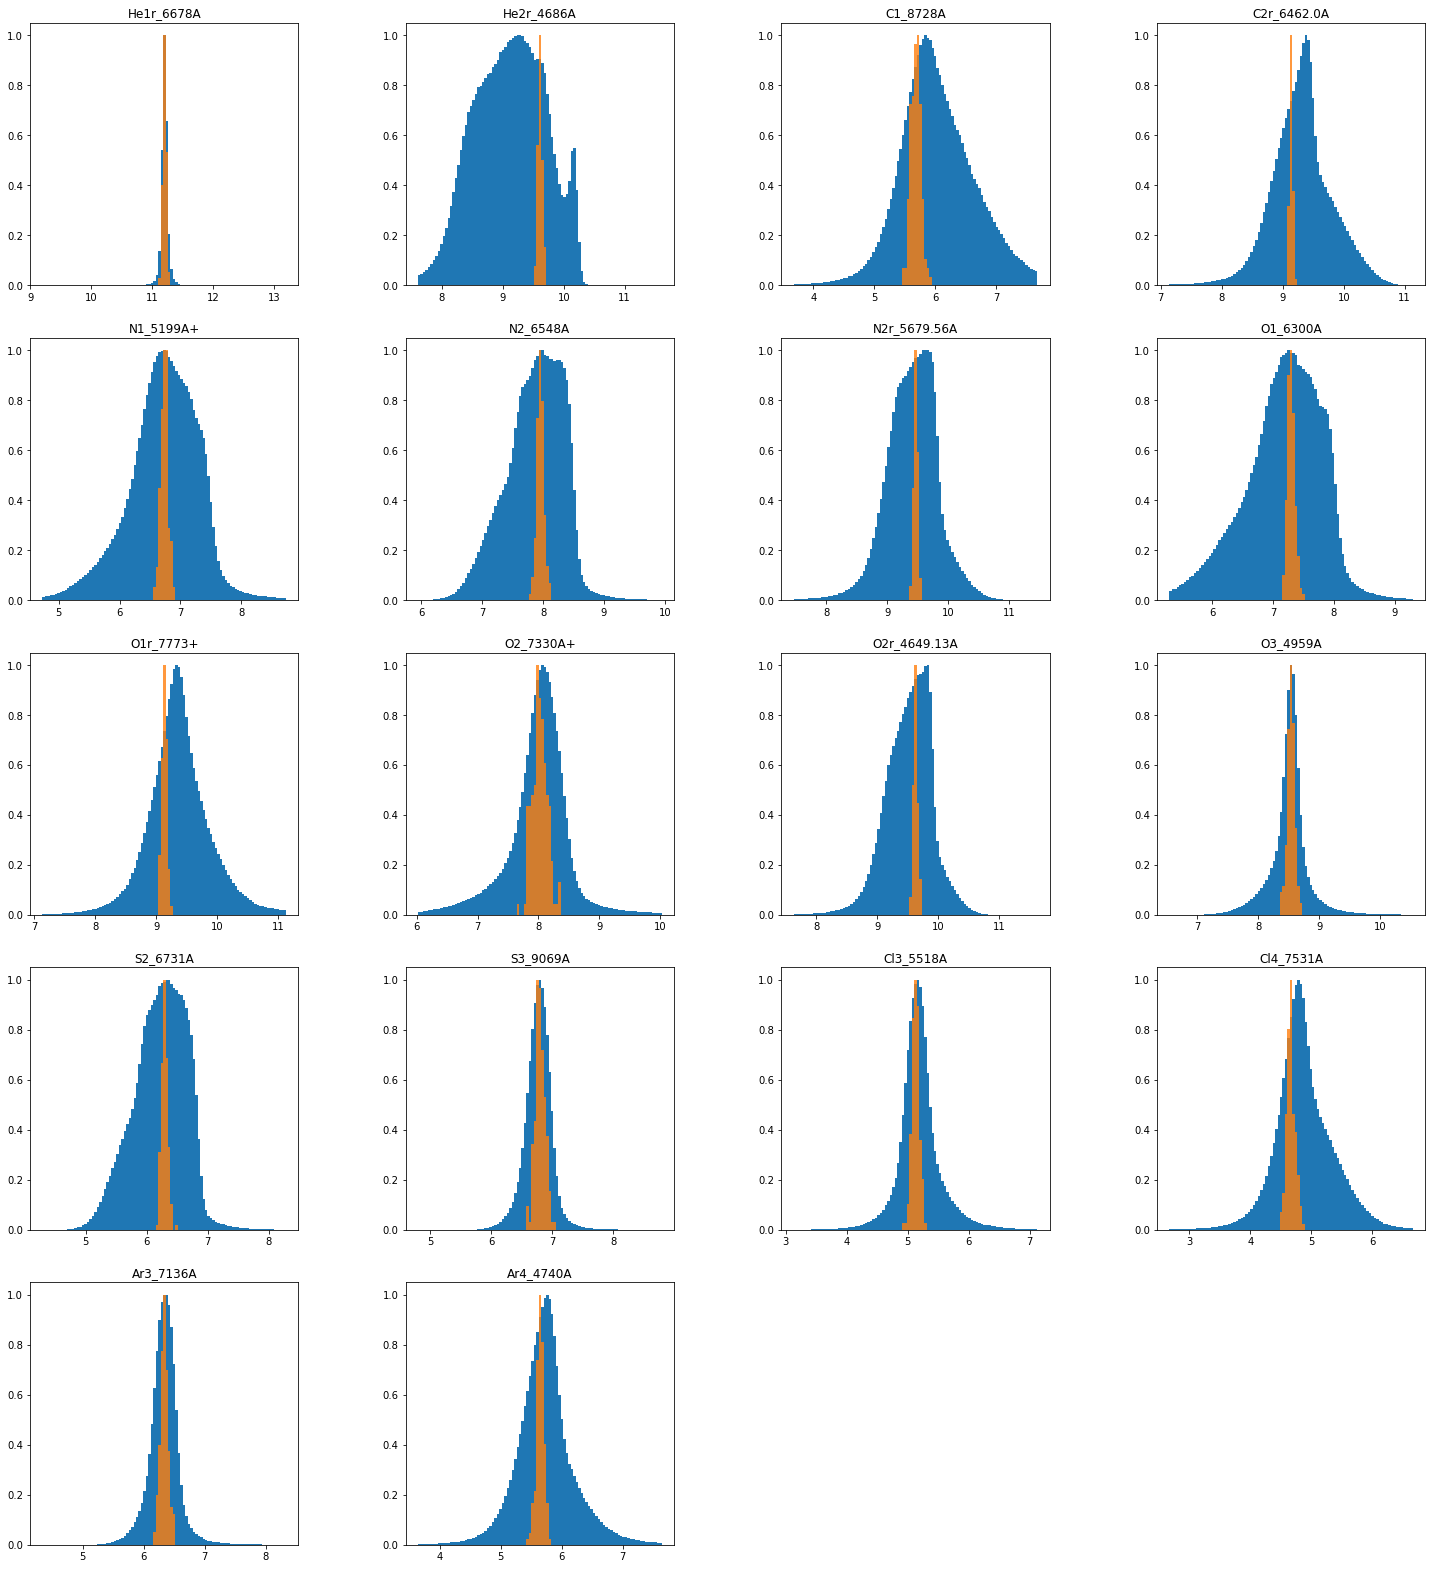

In [140]:
f, axes = plt.subplots(5,4,figsize=(25,28))
i_axes = 0
for label in line_labels:
    line = PL.obs.getLine(label=label)
    if line.is_valid:

        med = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[0,0,:]
        med0 = med[0]
        with np.errstate(divide='ignore', invalid='ignore'):
            d3d = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label])) * (PL.mask_Hb[..., np.newaxis])
            d2d = PL.obs.reshape(12+np.log10(PL.abund_dic[line.label]))[:,:,0] * (PL.mask_Hb)
        ax=axes.ravel()[i_axes]
        num_bin = 100
        bin_lims = np.linspace(med0-2, med0+2,num_bin)
        bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
        bin_widths = bin_lims[1:]-bin_lims[:-1]

        hist1, _ = np.histogram(d3d.ravel(), bins=np.linspace(med0-2, med0+2, num_bin))
        hist2, _ = np.histogram(med.ravel(), bins=np.linspace(med0-2, med0+2, num_bin))
        with np.errstate(divide='ignore', invalid='ignore'):
            hist1 = hist1 / np.max(hist1)
            hist2 = hist2 / np.max(hist2)
        ax.bar(bin_centers, hist1, width = bin_widths, align = 'center')
        ax.bar(bin_centers, hist2, width = bin_widths, align = 'center', alpha = 0.8)

        ax.set_title(line.label)
        i_axes += 1
    else:
        print('{} is invalid'.format(line.label))
axes.ravel()[-2].remove()
axes.ravel()[-1].remove()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2)
if save_plots:
    f.savefig(PDF_name+'_hist_abunds.pdf')